<h1 style="color:#872325"> Webscrapping </h1>

### Elaboró: Jorge Alberto Morúa Amaya
### Clave: 193699
### 01/03/2020

In [1]:
import os
import pandas as pd
import seaborn as sns
import requests
from requests_html import HTMLSession
from time import sleep
from datetime import datetime
import matplotlib.pyplot as plt
import locale
locale.setlocale(locale.LC_TIME, "en_EN.UTF-8")

'en_EN.UTF-8'

<h2 style="color:crimson">Ejercicios</h2>


1. Repite el ejemplo *Arxiv ML Papers (I)*, agrega dos nuevas columnas al DataFrame final: `Abstract`, con el resumen de cada paper; `Submitted`, con la fecha en la que fue agregado al sistema. **Hint**: Ambos elementos se encuentran dentro de la *url* encontrada.

----

In [4]:
url = "https://arxiv.org/list/stat.ML/recent"
with HTMLSession() as sess:
    r = sess.get(url)

In [8]:
divpage = r.html.find("div[id='dlpage']", first=True)

In [11]:
papers_links = divpage.find("dt")
papers_titles = divpage.find("dd")

In [12]:
values = []
for link_secc, title_secc in zip(papers_links, papers_titles):
    title = title_secc.find("div[class='list-title mathjax']", first=True).text
    
    abstract_url = link_secc.find("a[title='Abstract']", first=True).absolute_links
    abstract_url, *_ = abstract_url
    
    values.append([title, abstract_url])

In [74]:
df_values = pd.DataFrame(values, columns=["title", "url"])
df_values = df_values.assign(title=df_values.title.str.lstrip("Title: "))

In [86]:
dat_abs=[]
for link in df_values.url:
    with HTMLSession() as sess:
        lk = sess.get(link)
    v_dateline=lk.html.find("div[class='dateline']",first=True).text.lstrip("'(Submitted on ").rstrip(")")
    sub= lk.html.find("blockquote[class='abstract mathjax']",first=True).text.lstrip("Abstract: ")
    dat_abs.append([link,sub,datetime.strptime(v_dateline , "%d %b %Y")])
    sleep(0.5)

In [88]:
#Combierte los registros de lista a dataframe
df_abstract = pd.DataFrame(dat_abs, columns=["url", "Abstract" ,"Submitted"])

In [90]:
#unimos los dos dataframes mediante merge
df_final = df_values.merge(df_abstract, how='inner', on ="url")
df_final

,title,url,Abstract,Submitted
0,PAPRIKA: Private Online False Discovery Rate C...,https://arxiv.org/abs/2002.12321,"In hypothesis testing, a false discovery occur...",2020-02-27
1,MetFlow: A New Efficient Method for Bridging t...,https://arxiv.org/abs/2002.12253,"In this contribution, we propose a new computa...",2020-02-27
2,Semi-supervised Anomaly Detection on Attribute...,https://arxiv.org/abs/2002.12011,We propose a simple yet effective method for d...,2020-02-27
3,Fast and Three-rious: Speeding Up Weak Supervi...,https://arxiv.org/abs/2002.11955,Weak supervision is a popular method for build...,2020-02-27
4,Max-Affine Spline Insights into Deep Generativ...,https://arxiv.org/abs/2002.11912,We connect a large class of Generative Deep Ne...,2020-02-26
5,State-only Imitation with Transition Dynamics ...,https://arxiv.org/abs/2002.11879,Imitation Learning (IL) is a popular paradigm ...,2020-02-27
6,Conditional Sampling from Invertible Generativ...,https://arxiv.org/abs/2002.11743,We consider uncertainty aware compressive sens...,2020-02-26
7,A Distributional Framework for Data Valuation,https://arxiv.org/abs/2002.12334,Shapley value is a classic notion from game th...,2020-02-27
8,Estimating the Effects of Continuous-valued In...,https://arxiv.org/abs/2002.12326,While much attention has been given to the pro...,2020-02-27
9,he Spectral Underpinning of word2vec,https://arxiv.org/abs/2002.12317,word2vec due to Mikolov \textit{et al.} (2013)...,2020-02-27


----
2. Por medio de la librería `requests` y el API de AlphaVantage, consigue los precios históricos de las monedas `["MXN", "EUR", "BRL", "ARS", "CHF"]` respecto al dólar (todos los precios deben estar en dólares). Crea un DataFrame con cada colúmna la moneda de referencia:

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>MXN</th>      <th>EUR</th>      <th>BRL</th>      <th>ARS</th>      <th>CHF</th>    </tr>  </thead>  <tbody>    <tr>      <th>2014-11-24</th>      <td>0.0732</td>      <td>1.2438</td>      <td>0.3920</td>      <td>0.1169</td>      <td>1.0342</td>    </tr>    <tr>      <th>2014-11-25</th>      <td>0.0731</td>      <td>1.2473</td>      <td>0.3955</td>      <td>0.1169</td>      <td>1.0370</td>    </tr>    <tr>      <th>2014-11-26</th>      <td>0.0728</td>      <td>1.2507</td>      <td>0.3995</td>      <td>0.1168</td>      <td>1.0401</td>    </tr>    <tr>      <th>2014-11-27</th>      <td>0.0726</td>      <td>1.2458</td>      <td>0.3947</td>      <td>0.1169</td>      <td>1.0363</td>    </tr>    <tr>      <th>2014-11-28</th>      <td>0.0717</td>      <td>1.2451</td>      <td>0.3891</td>      <td>0.1168</td>      <td>1.0351</td>    </tr>  </tbody></table>


In [2]:
url = "https://www.alphavantage.co"
base_url = "https://www.alphavantage.co/query"
avkey = os.environ["ALPHA_VANTAGE_KEY"]

In [3]:
currencies = ["MXN", "EUR", "BRL", "ARS", "CHF"]

In [4]:
acum=[]
for curr in currencies:
    intraday2 = {
        "function": "FX_DAILY",
        "to_symbol": "USD",
        "from_symbol":  curr,
        "apikey": avkey,
        "outputsize": "full"
    }

    r = requests.get(base_url, params=intraday2)
    acum.append(r.json())
    sleep(0.5)


In [5]:
acum[0].keys()

dict_keys(['Meta Data', 'Time Series FX (Daily)'])

In [6]:
acum[0]["Meta Data"]

{'1. Information': 'Forex Daily Prices (open, high, low, close)',
 '2. From Symbol': 'MXN',
 '3. To Symbol': 'USD',
 '4. Output Size': 'Full size',
 '5. Last Refreshed': '2020-03-02 05:40:00',
 '6. Time Zone': 'UTC'}

In [7]:
#obtenemos los dataframes para cada moneda
#,columns=["open", "high" ,"low","close"]
df_MXN = pd.DataFrame(acum[0]["Time Series FX (Daily)"],dtype=float).T.sort_index()
df_EUR = pd.DataFrame(acum[1]["Time Series FX (Daily)"],dtype=float).T.sort_index()
df_BRL = pd.DataFrame(acum[2]["Time Series FX (Daily)"],dtype=float).T.sort_index()
df_ARS = pd.DataFrame(acum[3]["Time Series FX (Daily)"],dtype=float).T.sort_index()
df_CHF = pd.DataFrame(acum[4]["Time Series FX (Daily)"],dtype=float).T.sort_index()

In [8]:
#obtenemos la columna de cierre y lo guardamos en un dataframe
dfmex = pd.DataFrame(df_MXN["4. close"]).rename(columns={'4. close': 'MXN'})
dfeur = pd.DataFrame(df_EUR["4. close"]).rename(columns={'4. close': 'EUR'})
dfbrl = pd.DataFrame(df_BRL["4. close"]).rename(columns={'4. close': 'BRL'})
dfars = pd.DataFrame(df_ARS["4. close"]).rename(columns={'4. close': 'ARS'})
dfchf = pd.DataFrame(df_CHF["4. close"]).rename(columns={'4. close': 'CHF'})

In [9]:
#Unimos las columnas obtenidas
df_curr = dfmex.join(dfeur, how="inner").join(dfbrl, how="inner").join(dfars,how="inner").join(dfchf,how="inner")
df_curr

,MXN,EUR,BRL,ARS,CHF
2014-11-07,0.0737,1.2454,0.3902,0.1170,1.0341
2014-11-09,0.0738,1.2462,0.3894,0.1170,1.0359
2014-11-10,0.0734,1.2424,0.3933,0.1170,1.0328
2014-11-11,0.0735,1.2473,0.3894,0.1170,1.0364
2014-11-12,0.0737,1.2428,0.3890,0.1170,1.0337
...,...,...,...,...,...
2020-02-26,0.0518,1.0882,0.2242,0.0157,1.0233
2020-02-27,0.0512,1.1002,0.2224,0.0156,1.0323
2020-02-28,0.0510,1.1029,0.2230,0.0156,1.0353
2020-03-01,0.0503,1.1045,0.2230,0.0156,1.0369



3. Con el DataFrame creado en el ejercicio 2, crea el siguiente mapa de calor con la correlación entre cada una de las monedas. **hint**: Revisa que métodos tiene un DataFrame para crear correlaciones; considera la librería `seaborn`.

![](../files/lec04/imgs/heatmap.png)

---

In [10]:
#creamos la matriz de correlacion
df_corr = df_curr.corr()

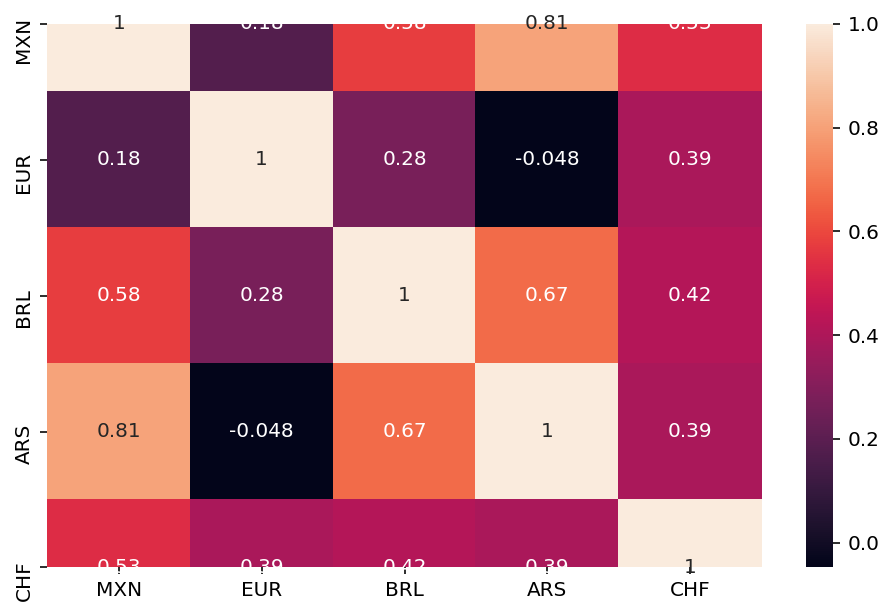

In [11]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (8, 5)
sns.heatmap(df_corr,annot=True)


4. Con el DataFrame creado en el ejercicio 2, crea un nuevo DataFrame que incluya una correlación móvil con ventana de 30 días de cada una de las monedas respecto a `"MXN"`. **hint**: Investiga sobre el método `.xs` de un DataFrame

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>EUR</th>      <th>BRL</th>      <th>ARS</th>      <th>CHF</th>    </tr>  </thead>  <tbody>    <tr>      <th>2015-03-19</th>      <td>0.900941</td>      <td>0.870440</td>      <td>0.835029</td>      <td>0.916637</td>    </tr>    <tr>      <th>2015-03-20</th>      <td>0.874866</td>      <td>0.815453</td>      <td>0.762308</td>      <td>0.903594</td>    </tr>    <tr>      <th>2015-03-22</th>      <td>0.866783</td>      <td>0.789977</td>      <td>0.726098</td>      <td>0.900547</td>    </tr>    <tr>      <th>2015-03-23</th>      <td>0.835823</td>      <td>0.728781</td>      <td>0.643129</td>      <td>0.885424</td>    </tr>    <tr>      <th>2015-03-24</th>      <td>0.801267</td>      <td>0.671188</td>      <td>0.560149</td>      <td>0.877682</td>    </tr>  </tbody></table>
---

In [12]:
d_inx = df_curr.rolling(30, min_periods=1).corr().sort_index()
d_inx = d_inx[['EUR','BRL','ARS','CHF']].xs('MXN', level=1)
df_correlacion = d_inx.filter(like='2015-03-', axis=0)
df_correlacion

,EUR,BRL,ARS,CHF
2015-03-01,0.311541,0.751747,0.571920,0.655627
2015-03-02,0.354500,0.690450,0.540067,0.590941
2015-03-03,0.440881,0.635329,0.500897,0.523166
2015-03-04,0.501404,0.637741,0.498793,0.534559
2015-03-05,0.608652,0.778176,0.617584,0.663441
2015-03-06,0.775768,0.874888,0.704396,0.772441
2015-03-08,0.837256,0.912038,0.742833,0.816046
2015-03-09,0.868753,0.923389,0.758535,0.842916
2015-03-10,0.902912,0.938705,0.773009,0.873737
2015-03-11,0.898748,0.943359,0.790987,0.881854


---
5. Con el DataFrame creado en el ejercicio 4, crea la siguiente figura con _scatterplots_ entre todas las combinaciones de las correlaciones respecto a `"MXN"`. ¿Encuentras algún patrón en alguna combinación?

![](../files/lec04/imgs/scatter.png)



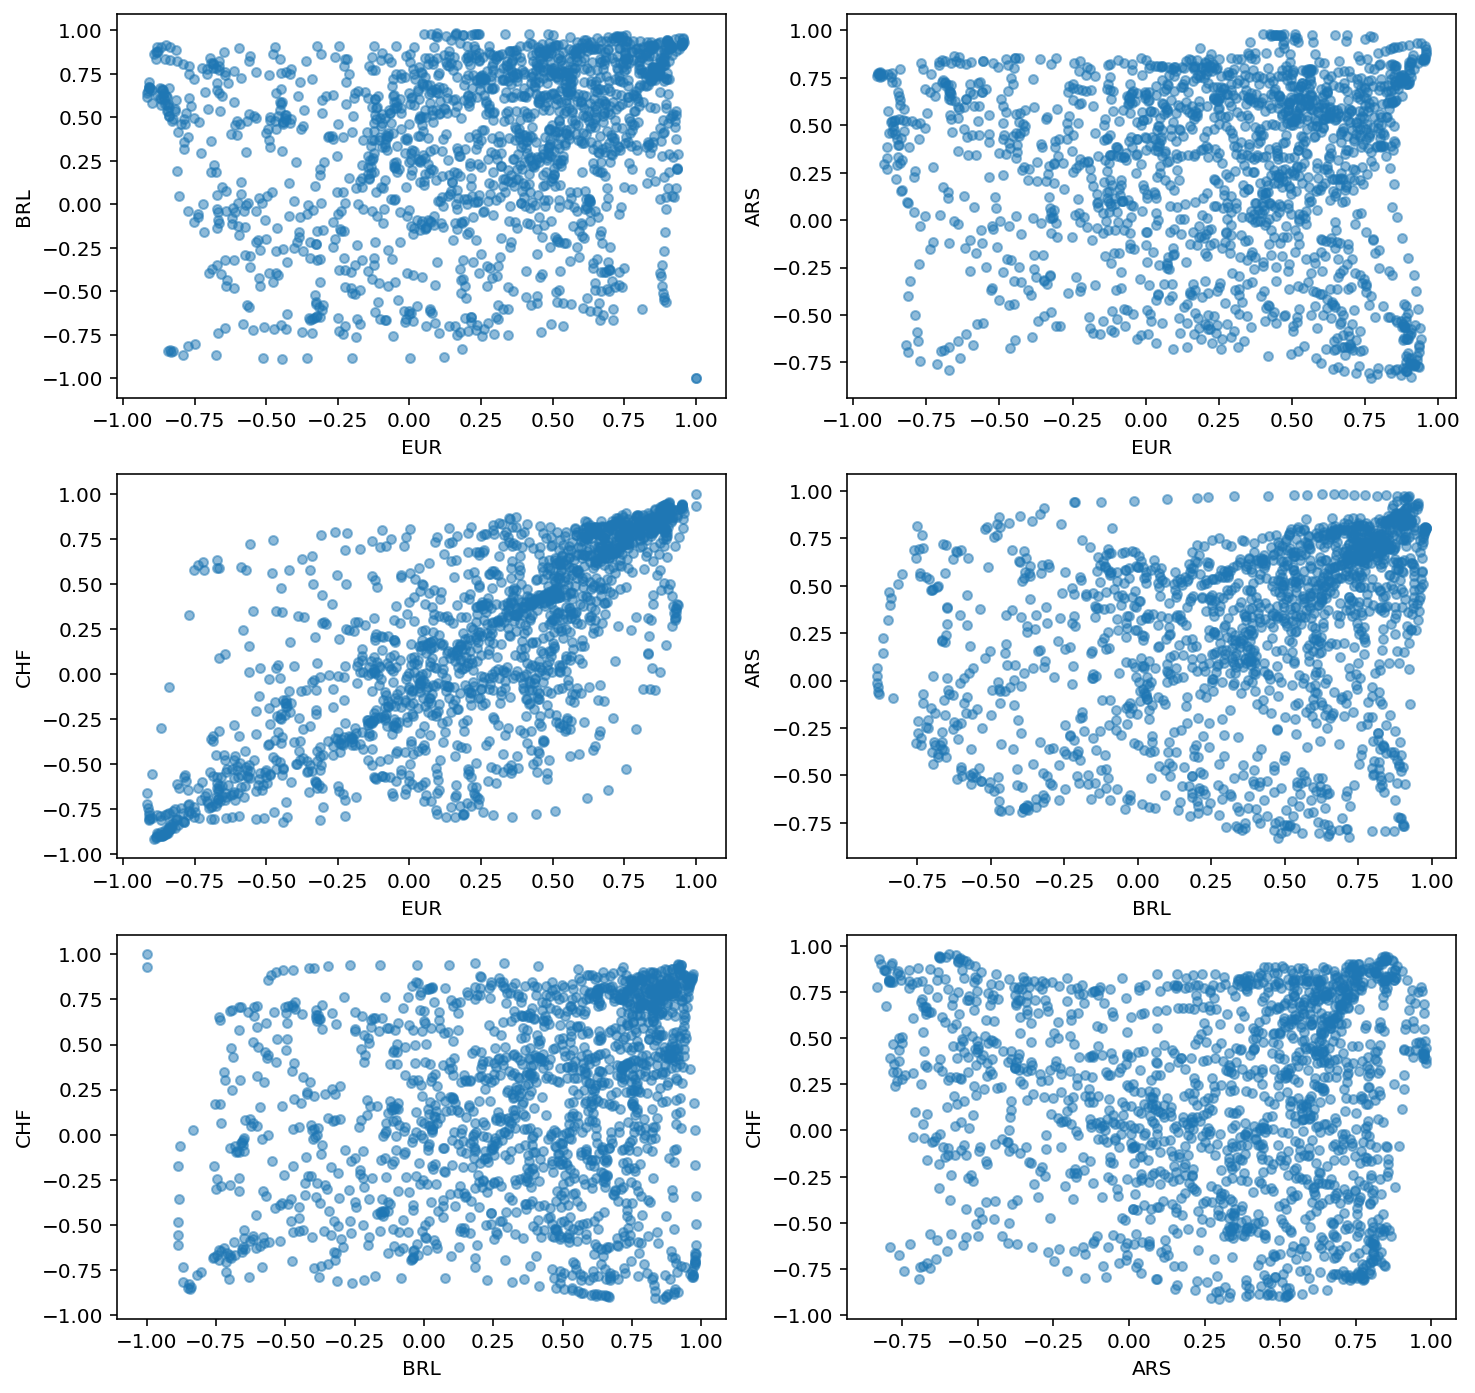

In [15]:
plt.rcParams["figure.figsize"] = (12, 12)
fig = plt.figure()
ax1_1 = fig.add_subplot(321)
ax1_2 = fig.add_subplot(322)
ax2_1 = fig.add_subplot(323)
ax2_2 = fig.add_subplot(324)
ax3_1 = fig.add_subplot(325)
ax3_2 = fig.add_subplot(326)

d_inx.plot.scatter(x='EUR',y='BRL',ax=ax1_1,alpha=.5)
d_inx.plot.scatter(x='EUR',y='ARS',ax=ax1_2,alpha=.5)
d_inx.plot.scatter(x='EUR',y='CHF',ax=ax2_1,alpha=.5)
d_inx.plot.scatter(x='BRL',y='ARS',ax=ax2_2,alpha=.5)
d_inx.plot.scatter(x='BRL',y='CHF',ax=ax3_1,alpha=.5)
d_inx.plot.scatter(x='ARS',y='CHF',ax=ax3_2,alpha=.5)

Se puede apreciar una relacion entre las monedas CHF y EUR ya que mientras aumenta el EUR  tambien tiende a aumentar el valor de CHF


6. Con el DataFrame creado en el ejercicio 4, crea la siguiente figura, la cuál representa, a cada observación, la correlación promedio entre todas las monedas respecto a `"MXN"` y unas bandas que representan la correlación máxima y mínima a cada observación.

![](../files/lec04/imgs/corr_ts.png)

In [21]:
#graficamos todos los puntos
v_avg = d_inx.mean(axis=1)
v_min = d_inx.min(axis=1)
v_max = d_inx.max(axis=1)

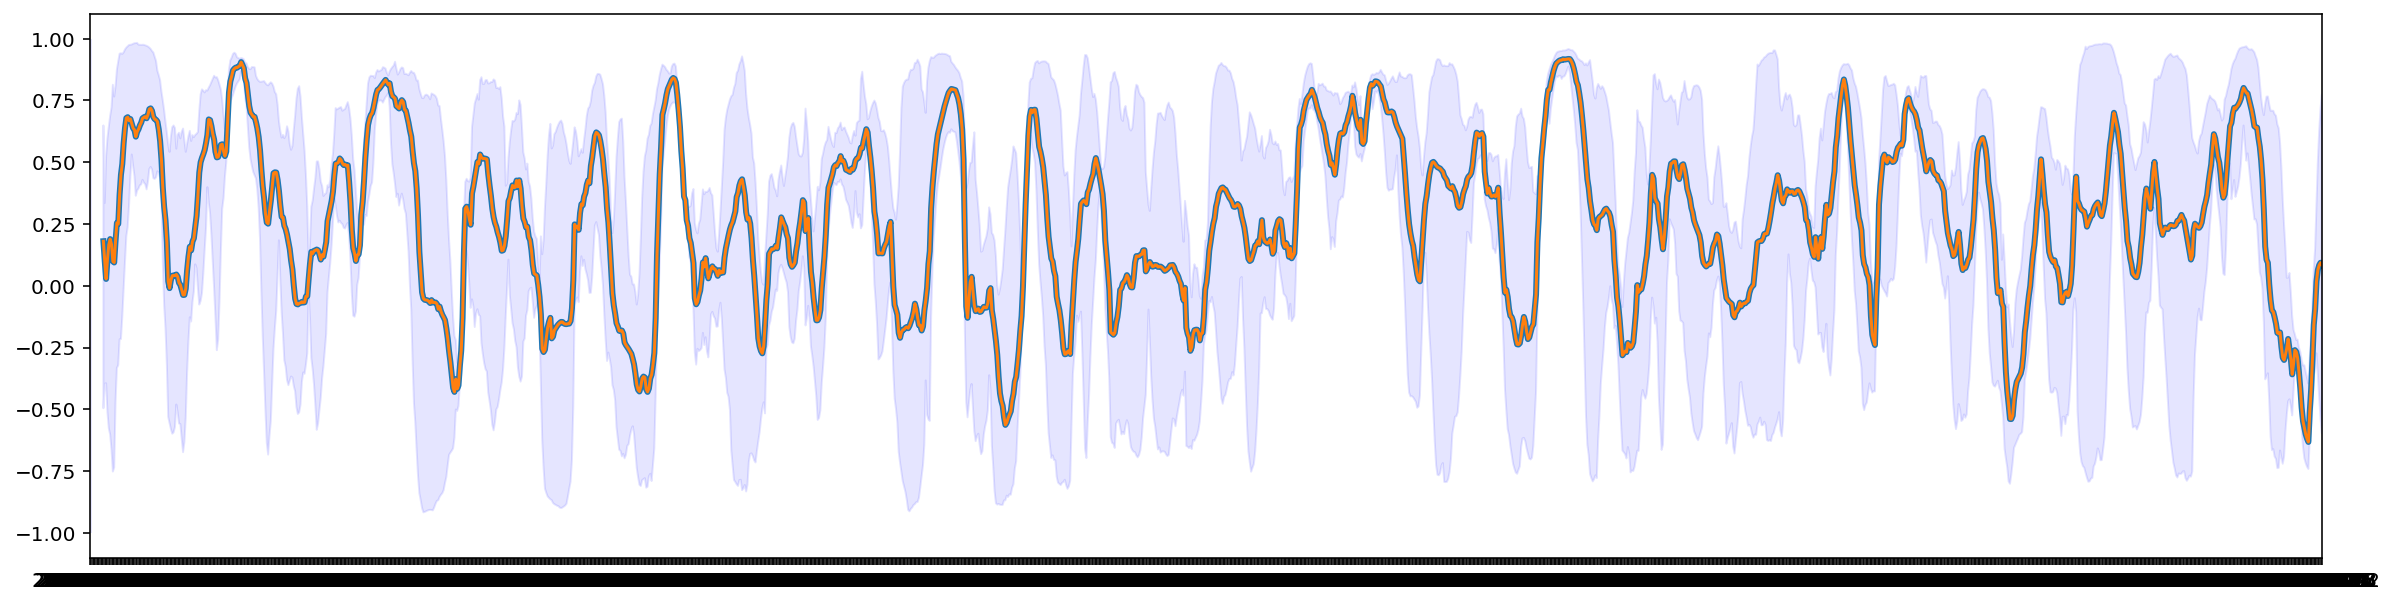

In [22]:
plt.rcParams["figure.figsize"] = (20, 5)
plt.plot(v_avg, linewidth=3) 
plt.fill_between(v_avg.index, v_min, v_max, color='b', alpha=.1)
v_avg.plot()

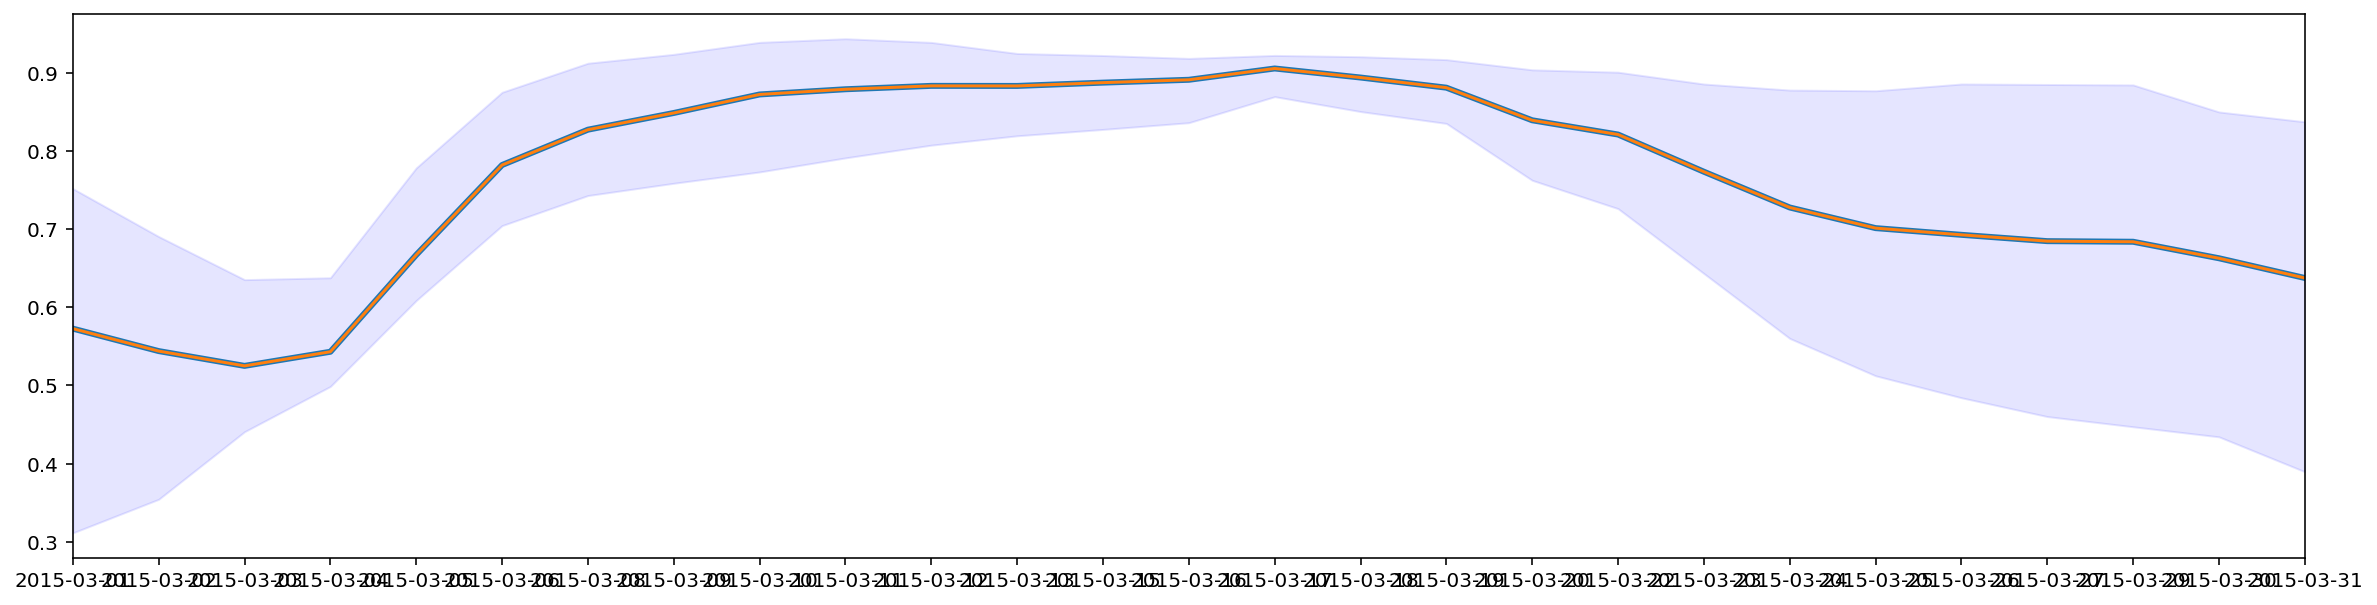

In [20]:
#graficamos solo el 2015
v_avg = df_correlacion.mean(axis=1).loc["2015-01-01": "2015-12-31"]
v_min = df_correlacion.min(axis=1).loc["2015-01-01": "2015-12-31"]
v_max = df_correlacion.max(axis=1).loc["2015-01-01": "2015-12-31"]
plt.plot(v_avg, linewidth=3) 
plt.fill_between(v_avg.index, v_min, v_max, color='b', alpha=.1)
v_avg.plot()